In [1]:
# Import pandas and yfinance
import pandas as pd
import yfinance as yf

# Import numpy
import numpy as np
from numpy import *
from numpy.linalg import multi_dot

# Plot settings
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 16, 8

In [2]:
# FAANG stocklist
symbols = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX' ]

# Number of assets
numofasset = len(symbols)

# Number of portfolio for optimization
numofportfolio = 5000

In [3]:
# Fetch data from yahoo finance for last six years
faangstocks = yf.download(symbols, start='2015-01-01', end='2021-07-22', progress=False)['Adj Close']

# Verify the output
faangstocks.tail()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2021-07-15,147.636520,181.559998,344.459991,2625.330078,542.950012
2021-07-16,145.558380,178.681503,341.160004,2636.909912,530.309998
2021-07-19,141.640778,177.479507,336.950012,2585.080078,532.280029
2021-07-20,145.319748,178.659500,341.660004,2622.030029,531.049988
2021-07-21,144.574020,179.259995,346.230011,2652.010010,513.630005


In [5]:
df = faangstocks

In [6]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
AAPL,1649.0,53.309600,33.595222,20.978710,28.161148,41.372601,63.640720,148.302704
AMZN,1649.0,76.850783,46.283692,14.347500,37.888500,75.614502,95.449501,186.570496
FB,1649.0,170.306095,63.583178,74.050003,119.870003,167.679993,196.809998,355.640015
GOOG,1649.0,1110.850512,454.284514,491.201416,767.039978,1060.619995,1263.209961,2652.010010
NFLX,1649.0,265.913408,152.497783,45.547142,115.809998,275.299988,368.149994,586.340027


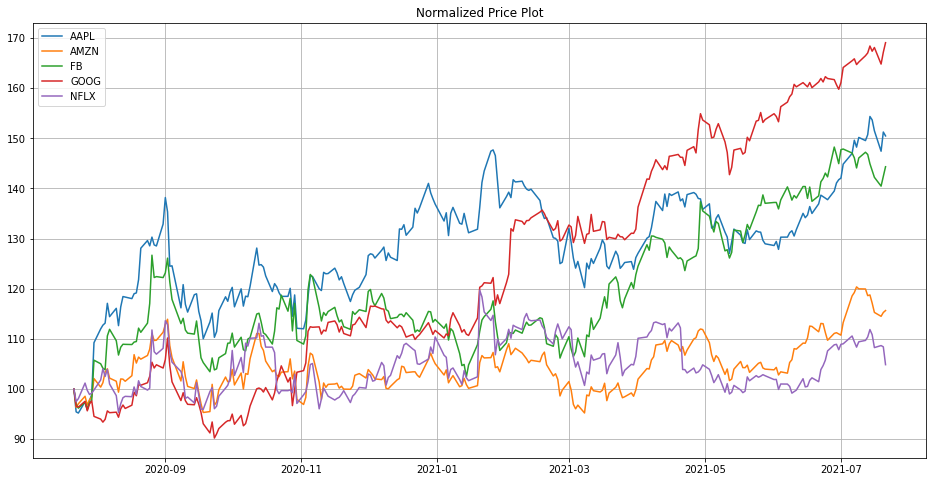

In [7]:
# Visualize the data
fig = plt.figure(figsize=(16,8))
ax = plt.axes()

ax.set_title('Normalized Price Plot')
ax.plot(df[-252:]/df.iloc[-252] * 100)
ax.legend(df.columns, loc='upper left')
ax.grid(True)

In [8]:
# Calculate returns 
returns = df.pct_change().fillna(0)
returns.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.028172,-0.020517,-0.016061,-0.020846,-0.050897
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.017121
2015-01-07,0.014022,0.010600,0.000000,-0.001713,0.005192
2015-01-08,0.038422,0.006836,0.026592,0.003153,0.022188


In [9]:
# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns

AAPL    0.313659
AMZN    0.420956
FB      0.277356
GOOG    0.283826
NFLX    0.443783
dtype: float64

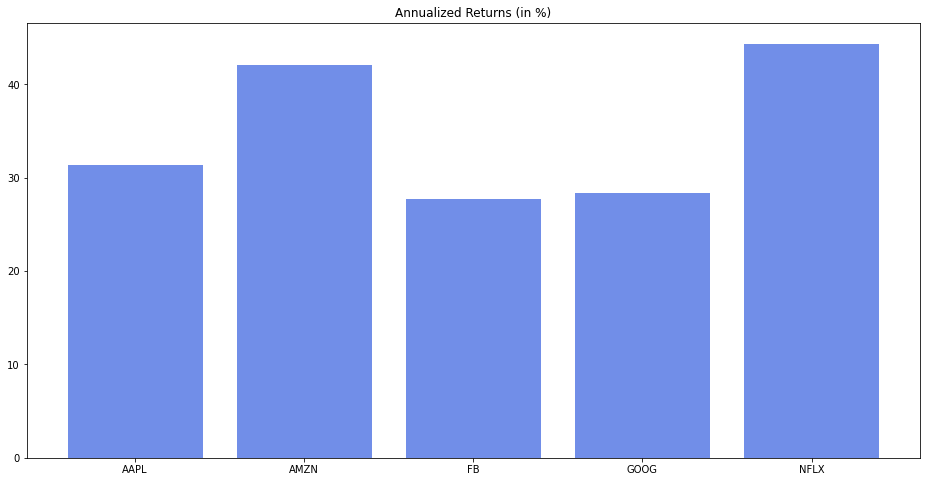

In [10]:
# Visualize the data
fig = plt.figure()
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)');

In [11]:
vols = returns.std()
vols

AAPL    0.018543
AMZN    0.019172
FB      0.019945
GOOG    0.016885
NFLX    0.026455
dtype: float64

In [12]:
# Calculate annualized volatilities
annual_vols = vols*sqrt(252)
annual_vols

AAPL    0.294356
AMZN    0.304340
FB      0.316609
GOOG    0.268033
NFLX    0.419954
dtype: float64

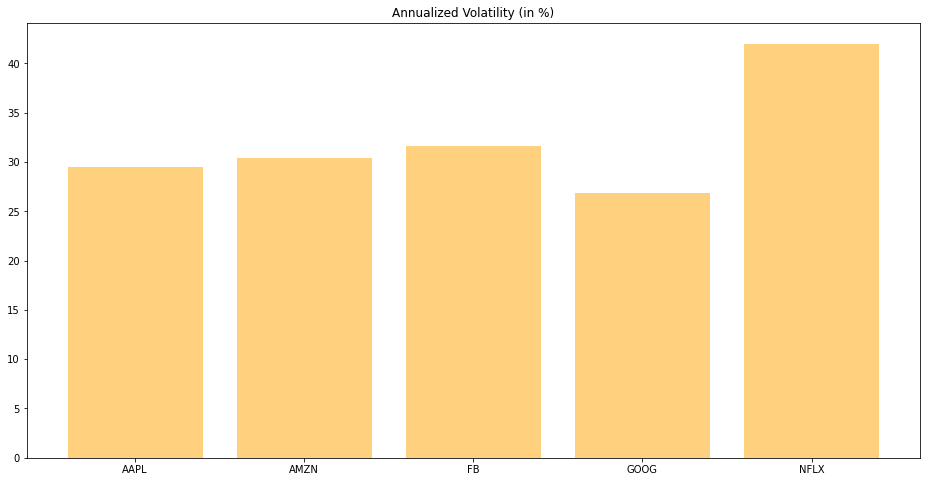

In [13]:
# Visualize the data
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)');

In [14]:
wts = numofasset * [1./numofasset]
array(wts).shape

(5,)

In [15]:
wts = numofasset * [1./numofasset]
wts = array(wts)[:,newaxis]
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [16]:
wts.shape

(5, 1)

In [17]:
ret = array(returns.mean() * 252)[:,newaxis]      
ret

array([[0.31365889],
       [0.42095605],
       [0.2773562 ],
       [0.28382553],
       [0.44378319]])

In [18]:
ret.shape 

(5, 1)

In [19]:
# Portfolio returns
wts.T @ ret   

array([[0.34791597]])

In [20]:
# Covariance matrix
cov = returns.cov() * 252
cov

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.086646,0.050035,0.053713,0.047473,0.051414
AMZN,0.050035,0.092623,0.057756,0.052610,0.067641
FB,0.053713,0.057756,0.100241,0.056450,0.059229
GOOG,0.047473,0.052610,0.056450,0.071842,0.054014
NFLX,0.051414,0.067641,0.059229,0.054014,0.176361


In [21]:
# Portfolio variance
var = multi_dot([wts.T, cov, wts])
var

array([[0.06513532]])

In [22]:
# Portfolio volatility
sqrt(var)

array([[0.25521623]])

In [23]:
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]    
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights])) 
    
    return np.array([port_rets, port_vols, port_rets/port_vols]).flatten()

In [24]:
w = random.random(numofasset)[:, newaxis]
w

array([[0.43190104],
       [0.57730913],
       [0.58286531],
       [0.4946523 ],
       [0.32685949]])

In [25]:
# Set weights such that sum of weights equals 1
w /= sum(w)
w

array([[0.17894569],
       [0.23919132],
       [0.24149336],
       [0.20494486],
       [0.13542476]])

In [26]:
# Initialize the lists
rets = []; vols = []; wts = []

# Simulate 5,000 portfolios
for i in range (5000):
    
    # Generate random weights
    weights = random.random(numofasset)[:, newaxis]
    
    # Set weights such that sum of weights equals 1
    weights /= sum(weights)
    
    # Portfolio statistics
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Record values     
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)

In [27]:
# Create a dataframe for analysis
msrp_df = pd.DataFrame({'returns': port_rets,
                      'volatility': port_vols,
                      'sharpe_ratio': port_rets/port_vols,
                      'weights': list(port_wts)})
msrp_df.head()

,returns,volatility,sharpe_ratio,weights
0,0.344372,0.253792,1.356910,"[0.1683257749231441, 0.1991400015661929, 0.202..."
1,0.347992,0.250563,1.388842,"[0.1906790204631879, 0.26604692289877657, 0.13..."
2,0.356433,0.262824,1.356168,"[0.010547116206507398, 0.2598447451100593, 0.1..."
3,0.321502,0.261246,1.230648,"[0.18318090763906822, 0.034214647663803284, 0...."
4,0.340098,0.255033,1.333541,"[0.20596865343628118, 0.14773093771584755, 0.2..."


In [28]:
# Summary Statistics
msrp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
returns,5000.0,0.348070,0.020325,0.285370,0.334383,0.347806,0.360748,0.428764
volatility,5000.0,0.261322,0.011295,0.244682,0.253435,0.259013,0.266570,0.347612
sharpe_ratio,5000.0,1.332162,0.057729,1.058836,1.296931,1.338138,1.374197,1.457852


In [29]:
# Max sharpe ratio portfolio 
msrp = msrp_df.iloc[msrp_df['sharpe_ratio'].idxmax()]
msrp

returns                                                  0.385904
volatility                                               0.264707
sharpe_ratio                                             1.457852
weights         [0.2559418324458341, 0.46441762280335513, 0.01...
Name: 552, dtype: object

In [30]:
# Max sharpe ratio portfolio weights
max_sharpe_port_wts = msrp_df['weights'][msrp_df['sharpe_ratio'].idxmax()]

# Allocation to achieve max sharpe ratio portfolio
dict(zip(symbols,np.around(max_sharpe_port_wts*100,2)))

{'AAPL': 25.59, 'AMZN': 46.44, 'FB': 1.03, 'GOOG': 7.67, 'NFLX': 19.27}

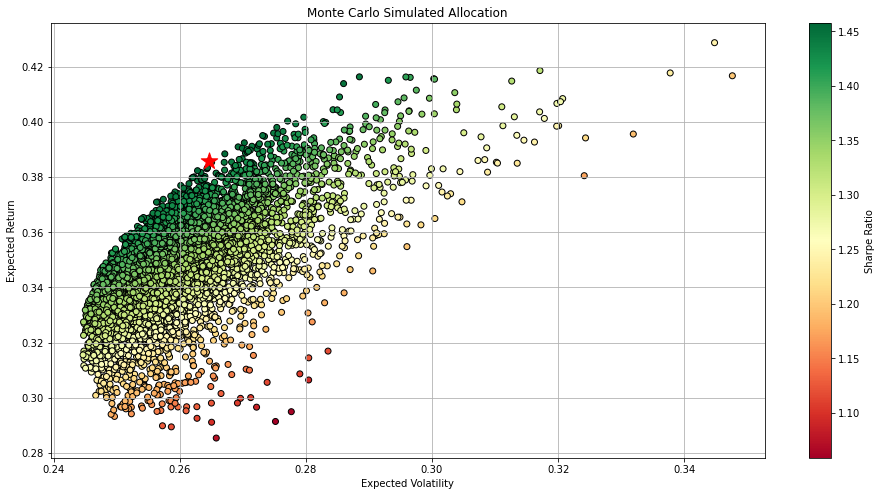

In [31]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols, 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum sharpe ratio portfolio
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

In [32]:
# Import optimization module from scipy
import scipy.optimize as sco

In [33]:
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

In [34]:
# Each asset boundary ranges from 0 to 1
tuple((0, 1) for x in range(numofasset))

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [35]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [36]:
# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [37]:
opt_sharpe

     fun: -1.4650659182744503
     jac: array([-2.20969319e-04,  3.45557928e-05,  1.16215587e-01,  9.47713852e-06,
        1.57997012e-04])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.13154892e-01, 5.80379925e-01, 1.88651178e-17, 3.74192264e-02,
       1.69045957e-01])

In [38]:
# Portfolio weights
list(zip(symbols,np.around(opt_sharpe['x']*100,2)))

[('AAPL', 21.32), ('AMZN', 58.04), ('FB', 0.0), ('GOOG', 3.74), ('NFLX', 16.9)]

In [39]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats,np.around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', 0.3968), ('Volatility', 0.2708), ('Sharpe Ratio', 1.4651)]

In [40]:
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

In [41]:
# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [42]:
opt_var

     fun: 0.059718727440402845
     jac: array([0.11937632, 0.11949673, 0.11950506, 0.11942781, 0.11961266])
 message: 'Optimization terminated successfully'
    nfev: 78
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.28368324, 0.17421727, 0.08602754, 0.42577215, 0.03029979])

In [43]:
# Portfolio weights
list(zip(symbols,np.around(opt_var['x']*100,2)))

[('AAPL', 28.37),
 ('AMZN', 17.42),
 ('FB', 8.6),
 ('GOOG', 42.58),
 ('NFLX', 3.03)]

In [44]:
# Portfolio stats
list(zip(stats,np.around(portfolio_stats(opt_var['x']),4)))

[('Returns', 0.3205), ('Volatility', 0.2444), ('Sharpe Ratio', 1.3114)]

In [45]:
# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [46]:
targetrets = linspace(0.28,0.44,100)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

C:\Users\Angelo\AppData\Local\Temp/ipykernel_1536/1495118366.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols,


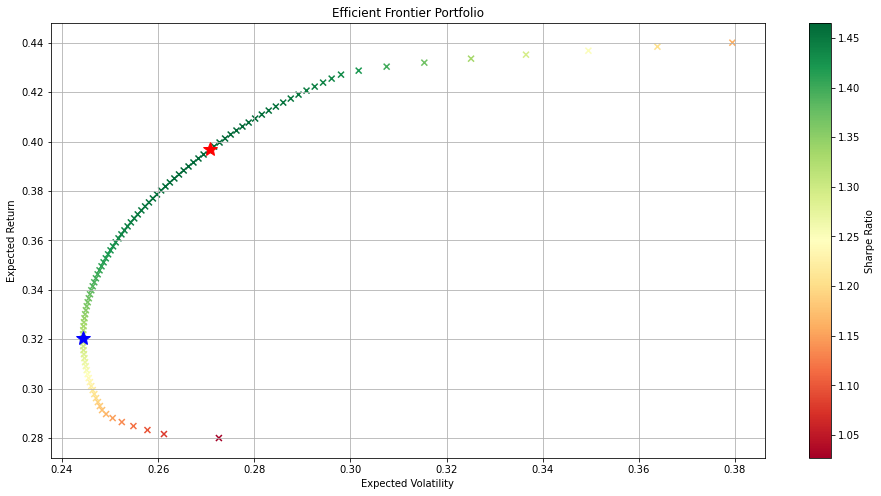

In [47]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Efficient Frontier Portfolio')

# Efficient Frontier
fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols, 
                        marker='x', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum Sharpe Portfolio
ax.plot(portfolio_stats(opt_sharpe['x'])[1], portfolio_stats(opt_sharpe['x'])[0], 'r*', markersize =15.0)

# Minimum Variance Portfolio
ax.plot(portfolio_stats(opt_var['x'])[1], portfolio_stats(opt_var['x'])[0], 'b*', markersize =15.0)

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)